# Analyzing the data set of YouTube channels
 
In this part of the project, we will use data science tools to clean and analyze the `summeryDB` dataset.
The dataset was create in [channels_statistics](channels_statistics.ipynb) jubyter notebook.


### Table of Contents

* [Imports](#chapter0)
* [Data preparation](#chapter1)
  * [Exploring the data](#section1)
  * [Cleaning the data](#section2)
  * [Adding new features](#section3)
* [Creating Visualizations](#chapter2)
* [The next step](#chaptern)

### Imports <a class='anchor' id='chapter0'>

In this section we will  import the  libraries we need.

In [2]:

import datetime as dt
import pandas as pd
import seaborn as sns
import re
from datetime import date
import json
import matplotlib.pyplot as plt


%matplotlib inline


### Data preparation <a class='anchor' id='chapter1'>

In [4]:
summery_df = pd.read_csv('data/summeryDB.csv')

#### Exploring the data <a class='anchor' id='section1'>

In [3]:
summery_df.head()

,channelName,title,channelId,kind,url,gender,rank,description,country,viewCount,subscriberCount,videoCount,publishedAt,uploads
0,Programming with Mosh,Programming with Mosh,UCWv7vMbMWH4-V0ZXdmDpPBA,youtube#channel,https://www.youtube.com/c/programmingwithmosh/...,Male,1,I train professional software engineers that c...,AU,82263182,1830000,161,2014-10-07T00:40:53Z,UUWv7vMbMWH4-V0ZXdmDpPBA
1,Traversy Media,Traversy Media,UC29ju8bIPH5as8OGnQzwJyA,youtube#channel,https://www.youtube.com/user/TechGuyWeb,Male,2,Traversy Media features the best online web de...,US,142390124,1560000,881,2009-10-30T21:33:14Z,UU29ju8bIPH5as8OGnQzwJyA
2,Corey Schafer,Corey Schafer,UCCezIgC97PvUuR4_gbFUs5g,youtube#channel,https://www.youtube.com/user/schafer5,Male,3,Welcome to my Channel. This channel is focused...,US,58863870,792000,230,2006-05-31T22:49:22Z,UUCezIgC97PvUuR4_gbFUs5g
3,Tech With Tim,Tech With Tim,UC4JX40jDee_tINbkjycV4Sg,youtube#channel,https://m.youtube.com/channel/UC4JX40jDee_tINb...,Male,4,"Learn programming, software engineering, machi...",CA,51968790,680000,602,2014-04-23T01:57:10Z,UU4JX40jDee_tINbkjycV4Sg
4,Krish Naik,Krish Naik,UCNU_lfiiWBdtULKOw6X0Dig,youtube#channel,https://www.youtube.com/user/krishnaik06/playl...,Male,5,"I work as a Lead Data Scientist, pioneering in...",IN,28303465,390000,1102,2012-02-11T04:05:06Z,UUNU_lfiiWBdtULKOw6X0Dig


In [5]:
summery_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   channelName      67 non-null     object
 1   title            67 non-null     object
 2   channelId        67 non-null     object
 3   kind             67 non-null     object
 4   url              67 non-null     object
 5   gender           65 non-null     object
 6   rank             67 non-null     int64 
 7   description      66 non-null     object
 8   country          62 non-null     object
 9   viewCount        67 non-null     int64 
 10  subscriberCount  67 non-null     int64 
 11  videoCount       67 non-null     int64 
 12  publishedAt      67 non-null     object
 13  uploads          67 non-null     object
dtypes: int64(4), object(10)
memory usage: 7.5+ KB


We notice one missing value in the `description` column, and five in the `country` column.

In [5]:
summery_df.describe(include='all')

,channelName,title,channelId,kind,url,gender,rank,description,country,viewCount,subscriberCount,videoCount,publishedAt,uploads
count,67,67,67,67,67,65,67.000000,66,62,6.700000e+01,6.700000e+01,67.000000,67,67
unique,67,67,67,1,67,2,NaN,66,14,NaN,NaN,NaN,67,67
top,Joshua Fluke,Papaya Coders,UCRPMAqdtSgd0Ipeef7iFsKw,youtube#channel,https://www.youtube.com/channel/UCgzKCeDYLRzPh...,Male,NaN,"Hello! My name is YK, and I usually make video...",US,NaN,NaN,NaN,2018-03-02T23:31:14Z,UU4JX40jDee_tINbkjycV4Sg
freq,1,1,1,67,1,63,NaN,1,31,NaN,NaN,NaN,1,1
mean,NaN,NaN,NaN,NaN,NaN,NaN,35.402985,NaN,NaN,5.147115e+07,6.675544e+05,732.701493,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,20.769339,NaN,NaN,8.177646e+07,1.024389e+06,1992.965105,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,5.709000e+03,8.600000e+01,24.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,17.500000,NaN,NaN,7.020058e+06,1.095000e+05,153.500000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,35.000000,NaN,NaN,2.056215e+07,3.220000e+05,320.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,53.500000,NaN,NaN,5.763584e+07,7.575000e+05,879.500000,NaN,NaN


The column `kind` contine only one category. The coulum can easly be droped.   
We are going to change datetime format of the `publshedAt` column to yyyy-mm-dd.

#### Cleaning the data <a class='anchor' id='section2'>

Let's display rows missing values.

In [6]:
summery_df[summery_df.isnull().any(axis=1)]

,channelName,title,channelId,kind,url,gender,rank,description,country,viewCount,subscriberCount,videoCount,publishedAt,uploads
5,freeCodeCamp.org,freeCodeCamp.org,UC8butISFwT-Wl7EV0hUK0BQ,youtube#channel,https://www.youtube.com/channel/UC8butISFwT-Wl...,NaN,6,Learn to code for free.,US,197380290,3780000,1164,2014-12-16T21:18:48Z,UU8butISFwT-Wl7EV0hUK0BQ
20,Kalle Hallden,Kalle Hallden,UCWr0mx597DnSGLFk1WfvSkQ,youtube#channel,https://www.youtube.com/channel/UCWr0mx597DnSG...,Male,21,"Hi, I am 300 moons old. I count everything in ...",NaN,33062991,514000,190,2015-10-18T20:39:56Z,UUWr0mx597DnSGLFk1WfvSkQ
33,Scott Hansellman,Scott Hanselman,UCL-fHOdarou-CR2XUmK48Og,youtube#channel,https://www.youtube.com/user/shanselman,Male,35,I'm a teacher. I speak all over to whomever wi...,NaN,8995924,125000,313,2006-03-15T10:14:39Z,UUL-fHOdarou-CR2XUmK48Og
39,CodingEntrepreneurs,CodingEntrepreneurs,UCWEHue8kksIaktO8KTTN_zg,youtube#channel,https://www.youtube.com/user/CodingEntrepreneurs,Male,42,Coding for Entrepreneurs is a Programming Seri...,NaN,15831903,179000,671,2013-06-30T00:56:13Z,UUWEHue8kksIaktO8KTTN_zg
49,Chris Coyier,Chris Coyier,UCADyUOnhyEoQqrw_RrsGleA,youtube#channel,https://www.youtube.com/user/realcsstricks,Male,53,This is the official YouTube channel for CSS-T...,NaN,3651883,59600,292,2011-05-12T01:53:15Z,UUADyUOnhyEoQqrw_RrsGleA
53,chuck severance,Chuck Severance,UChYfrRp_CWyqOt-ZYJGOgmA,youtube#channel,https://m.youtube.com/user/csev,Male,57,NaN,NaN,7776775,62100,878,2006-08-19T14:24:00Z,UUhYfrRp_CWyqOt-ZYJGOgmA
65,durga software solutions,Durga Software Solutions,UCbjozK_PYCTLEluFlrJ8UZg,youtube#channel,https://www.youtube.com/c/DurgaSoftwareSolutions,NaN,70,"DURGA Software Solutions is an Institute, whic...",IN,124800178,582000,16443,2014-02-03T04:15:47Z,UUbjozK_PYCTLEluFlrJ8UZg


In [7]:
country_count = summery_df.country.value_counts()
country_count

US    31
IN    11
CA     5
AU     3
GB     2
NO     2
DE     1
PE     1
PK     1
KR     1
EE     1
RO     1
DK     1
PL     1
Name: country, dtype: int64

The `US` is the `mode` of the `country` column, we can just replace the missing value in this column with `US`. 
```
summery_df['country'] = summery_df['country'].fillna(summery_df['country'].mode()[0])
```
Since we only have five missing values, we can check the YouTube web page for channels with a missing value to see if we can find  the missing values.   
After quick research we find all missing value in the country column, the missing values were all `US` (big suprise).

In [8]:
#filling the missing data
summery_df.country.fillna('US', inplace=True) #.value_counts()

In [9]:
country_count = summery_df.country.value_counts()
country_count

US    36
IN    11
CA     5
AU     3
GB     2
NO     2
DE     1
PE     1
PK     1
KR     1
EE     1
RO     1
DK     1
PL     1
Name: country, dtype: int64

In [10]:
summery_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   channelName      67 non-null     object
 1   title            67 non-null     object
 2   channelId        67 non-null     object
 3   kind             67 non-null     object
 4   url              67 non-null     object
 5   gender           65 non-null     object
 6   rank             67 non-null     int64 
 7   description      66 non-null     object
 8   country          67 non-null     object
 9   viewCount        67 non-null     int64 
 10  subscriberCount  67 non-null     int64 
 11  videoCount       67 non-null     int64 
 12  publishedAt      67 non-null     object
 13  uploads          67 non-null     object
dtypes: int64(4), object(10)
memory usage: 7.5+ KB


we will convert the type of `viewCount`, `subscriCount` and `videoCount` columns to `int`.

In [11]:
summery_df = summery_df.astype({'viewCount':'int64', 'subscriberCount':'int32', 'videoCount':'int32'}).copy()

we convert the type of `publishedAt` column to `datetime` type and keep only the date part, to result we be saved in new column `publishedDate`.

In [12]:
summery_df['publishedDate'] = pd.to_datetime(pd.to_datetime(summery_df.publishedAt).dt.date)

In [13]:
summery_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   channelName      67 non-null     object        
 1   title            67 non-null     object        
 2   channelId        67 non-null     object        
 3   kind             67 non-null     object        
 4   url              67 non-null     object        
 5   gender           65 non-null     object        
 6   rank             67 non-null     int64         
 7   description      66 non-null     object        
 8   country          67 non-null     object        
 9   viewCount        67 non-null     int64         
 10  subscriberCount  67 non-null     int32         
 11  videoCount       67 non-null     int32         
 12  publishedAt      67 non-null     object        
 13  uploads          67 non-null     object        
 14  publishedDate    67 non-null     datetime64[

In [14]:
summery_df.kind.value_counts()

youtube#channel    67
Name: kind, dtype: int64

We will drop `kind` column.

In [15]:
summery_df.drop('kind', axis=1, inplace=True)

#### Adding new features <a class='anchor' id='section3'>

Adding new features to a data set can improve the performance of a model. 

In [16]:
country_count = summery_df.country.value_counts()


##### Country name column

It will be easier to recognize the country if we add the country name instead of only having the country code.  
In [The two-letter country code](country_abbreviation.ipynb) jupyter notebook, we have created a database that associates each country with the corresponding country code. This dataset will be used to create the new column `country` and the current column `country` will be renamed `countryCode`.

In [17]:
country_code = pd.read_csv('data/two_letter_country_code.csv', index_col=0,  squeeze=True)

In [18]:
country_code.head()

ISO 3166 ALPHA-2
AF       Afghanistan
AX     Aland Islands
AL           Albania
DZ           Algeria
AS    American Samoa
Name: Country, dtype: object

In [19]:
country_list = country_count.index
country_list

Index(['US', 'IN', 'CA', 'AU', 'GB', 'NO', 'DE', 'PE', 'PK', 'KR', 'EE', 'RO',
       'DK', 'PL'],
      dtype='object')

Map the country code to the country name.

In [20]:
country_map = {index:country_code[index] for index in country_list}

In [21]:
country_map

{'US': 'United States',
 'IN': 'India',
 'CA': 'Canada',
 'AU': 'Australia',
 'GB': 'United Kingdom',
 'NO': 'Norway',
 'DE': 'Germany',
 'PE': 'Peru',
 'PK': 'Pakistan',
 'KR': 'South Korea',
 'EE': 'Estonia',
 'RO': 'Romania',
 'DK': 'Denmark',
 'PL': 'Poland'}

Groupe all the country with a single channel to a category called `Other`.

In [22]:
country_map2 = {index:country_code[index]  if country_count.loc[index] > 1 else 'Other' for index in country_list}

In [23]:
country_map2

{'US': 'United States',
 'IN': 'India',
 'CA': 'Canada',
 'AU': 'Australia',
 'GB': 'United Kingdom',
 'NO': 'Norway',
 'DE': 'Other',
 'PE': 'Other',
 'PK': 'Other',
 'KR': 'Other',
 'EE': 'Other',
 'RO': 'Other',
 'DK': 'Other',
 'PL': 'Other'}

Rename the current `country` column to `countryCode`.

In [24]:
summery_df.rename({'country':'countryCode'}, axis=1, inplace=True)

Create the new `country` column.

In [25]:
summery_df['country'] = summery_df.countryCode.map(country_map)

Create  new column called `countryOther`.

In [26]:
summery_df['countryOther'] = summery_df.countryCode.map(country_map2)

In [27]:
summery_df.head(5)

,channelName,title,channelId,url,gender,rank,description,countryCode,viewCount,subscriberCount,videoCount,publishedAt,uploads,publishedDate,country,countryOther
0,Programming with Mosh,Programming with Mosh,UCWv7vMbMWH4-V0ZXdmDpPBA,https://www.youtube.com/c/programmingwithmosh/...,Male,1,I train professional software engineers that c...,AU,82263182,1830000,161,2014-10-07T00:40:53Z,UUWv7vMbMWH4-V0ZXdmDpPBA,2014-10-07,Australia,Australia
1,Traversy Media,Traversy Media,UC29ju8bIPH5as8OGnQzwJyA,https://www.youtube.com/user/TechGuyWeb,Male,2,Traversy Media features the best online web de...,US,142390124,1560000,881,2009-10-30T21:33:14Z,UU29ju8bIPH5as8OGnQzwJyA,2009-10-30,United States,United States
2,Corey Schafer,Corey Schafer,UCCezIgC97PvUuR4_gbFUs5g,https://www.youtube.com/user/schafer5,Male,3,Welcome to my Channel. This channel is focused...,US,58863870,792000,230,2006-05-31T22:49:22Z,UUCezIgC97PvUuR4_gbFUs5g,2006-05-31,United States,United States
3,Tech With Tim,Tech With Tim,UC4JX40jDee_tINbkjycV4Sg,https://m.youtube.com/channel/UC4JX40jDee_tINb...,Male,4,"Learn programming, software engineering, machi...",CA,51968790,680000,602,2014-04-23T01:57:10Z,UU4JX40jDee_tINbkjycV4Sg,2014-04-23,Canada,Canada
4,Krish Naik,Krish Naik,UCNU_lfiiWBdtULKOw6X0Dig,https://www.youtube.com/user/krishnaik06/playl...,Male,5,"I work as a Lead Data Scientist, pioneering in...",IN,28303465,390000,1102,2012-02-11T04:05:06Z,UUNU_lfiiWBdtULKOw6X0Dig,2012-02-11,India,India


In [28]:
summery_df.countryOther.value_counts()

United States     36
India             11
Other              8
Canada             5
Australia          3
United Kingdom     2
Norway             2
Name: countryOther, dtype: int64

In [29]:
summery_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   channelName      67 non-null     object        
 1   title            67 non-null     object        
 2   channelId        67 non-null     object        
 3   url              67 non-null     object        
 4   gender           65 non-null     object        
 5   rank             67 non-null     int64         
 6   description      66 non-null     object        
 7   countryCode      67 non-null     object        
 8   viewCount        67 non-null     int64         
 9   subscriberCount  67 non-null     int32         
 10  videoCount       67 non-null     int32         
 11  publishedAt      67 non-null     object        
 12  uploads          67 non-null     object        
 13  publishedDate    67 non-null     datetime64[ns]
 14  country          67 non-null     object     

##### Continent name column

In [30]:
continent =  pd.read_csv('data/continent_country_code.csv', keep_default_na=False, index_col='a-2')

In [31]:
continent.head()

,CC,continent
a-2,,
AF,AS,Asia
AL,EU,Europe
AQ,AN,Antarctica
DZ,AF,Africa
AS,OC,Oceania


Map the country  to continent name

In [32]:
continent_map = {index:continent.continent[index] for index in country_list}

In [33]:
continent_map

{'US': 'North america',
 'IN': 'Asia',
 'CA': 'North america',
 'AU': 'Oceania',
 'GB': 'Europe',
 'NO': 'Europe',
 'DE': 'Europe',
 'PE': 'South america',
 'PK': 'Asia',
 'KR': 'Asia',
 'EE': 'Europe',
 'RO': 'Europe',
 'DK': 'Europe',
 'PL': 'Europe'}

Create new column `continent`

In [34]:
summery_df['continent'] = summery_df.countryCode.map(continent_map)

In [35]:
summery_df['continent'].value_counts()

North america    41
Asia             13
Europe            9
Oceania           3
South america     1
Name: continent, dtype: int64

In [36]:
summery_df.head()

,channelName,title,channelId,url,gender,rank,description,countryCode,viewCount,subscriberCount,videoCount,publishedAt,uploads,publishedDate,country,countryOther,continent
0,Programming with Mosh,Programming with Mosh,UCWv7vMbMWH4-V0ZXdmDpPBA,https://www.youtube.com/c/programmingwithmosh/...,Male,1,I train professional software engineers that c...,AU,82263182,1830000,161,2014-10-07T00:40:53Z,UUWv7vMbMWH4-V0ZXdmDpPBA,2014-10-07,Australia,Australia,Oceania
1,Traversy Media,Traversy Media,UC29ju8bIPH5as8OGnQzwJyA,https://www.youtube.com/user/TechGuyWeb,Male,2,Traversy Media features the best online web de...,US,142390124,1560000,881,2009-10-30T21:33:14Z,UU29ju8bIPH5as8OGnQzwJyA,2009-10-30,United States,United States,North america
2,Corey Schafer,Corey Schafer,UCCezIgC97PvUuR4_gbFUs5g,https://www.youtube.com/user/schafer5,Male,3,Welcome to my Channel. This channel is focused...,US,58863870,792000,230,2006-05-31T22:49:22Z,UUCezIgC97PvUuR4_gbFUs5g,2006-05-31,United States,United States,North america
3,Tech With Tim,Tech With Tim,UC4JX40jDee_tINbkjycV4Sg,https://m.youtube.com/channel/UC4JX40jDee_tINb...,Male,4,"Learn programming, software engineering, machi...",CA,51968790,680000,602,2014-04-23T01:57:10Z,UU4JX40jDee_tINbkjycV4Sg,2014-04-23,Canada,Canada,North america
4,Krish Naik,Krish Naik,UCNU_lfiiWBdtULKOw6X0Dig,https://www.youtube.com/user/krishnaik06/playl...,Male,5,"I work as a Lead Data Scientist, pioneering in...",IN,28303465,390000,1102,2012-02-11T04:05:06Z,UUNU_lfiiWBdtULKOw6X0Dig,2012-02-11,India,India,Asia


In [37]:
summery_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   channelName      67 non-null     object        
 1   title            67 non-null     object        
 2   channelId        67 non-null     object        
 3   url              67 non-null     object        
 4   gender           65 non-null     object        
 5   rank             67 non-null     int64         
 6   description      66 non-null     object        
 7   countryCode      67 non-null     object        
 8   viewCount        67 non-null     int64         
 9   subscriberCount  67 non-null     int32         
 10  videoCount       67 non-null     int32         
 11  publishedAt      67 non-null     object        
 12  uploads          67 non-null     object        
 13  publishedDate    67 non-null     datetime64[ns]
 14  country          67 non-null     object     

We will  convert the type of the columns `country`, `countryCode`, `countryOther` and `continent` to categorical.

In [38]:
summery_df = summery_df.astype({'country':'category', 'countryCode':'category', 'countryOther':'category', 'continent':'category'}).copy()

In [39]:
summery_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   channelName      67 non-null     object        
 1   title            67 non-null     object        
 2   channelId        67 non-null     object        
 3   url              67 non-null     object        
 4   gender           65 non-null     object        
 5   rank             67 non-null     int64         
 6   description      66 non-null     object        
 7   countryCode      67 non-null     category      
 8   viewCount        67 non-null     int64         
 9   subscriberCount  67 non-null     int32         
 10  videoCount       67 non-null     int32         
 11  publishedAt      67 non-null     object        
 12  uploads          67 non-null     object        
 13  publishedDate    67 non-null     datetime64[ns]
 14  country          67 non-null     category   

### Creating Visualizations <a class='anchor' id='chapter2'>

##### Gender column

It is well known that the tech industry is still a male-dominated sector. This article about [" women in technology"] (https://builtin.com/women-tech/women-in-tech-workplace-statistics) provides some statistical insight about this important topic.   
We added `gender` column to dataset to illustrate that this situation also applies to the youtube tech channels.


In [40]:
summery_df.gender.value_counts()

Male      63
Female     2
Name: gender, dtype: int64

In [41]:
summery_df[summery_df.isnull().any(axis=1)]

,channelName,title,channelId,url,gender,rank,description,countryCode,viewCount,subscriberCount,videoCount,publishedAt,uploads,publishedDate,country,countryOther,continent
5,freeCodeCamp.org,freeCodeCamp.org,UC8butISFwT-Wl7EV0hUK0BQ,https://www.youtube.com/channel/UC8butISFwT-Wl...,NaN,6,Learn to code for free.,US,197380290,3780000,1164,2014-12-16T21:18:48Z,UU8butISFwT-Wl7EV0hUK0BQ,2014-12-16,United States,United States,North america
53,chuck severance,Chuck Severance,UChYfrRp_CWyqOt-ZYJGOgmA,https://m.youtube.com/user/csev,Male,57,NaN,US,7776775,62100,878,2006-08-19T14:24:00Z,UUhYfrRp_CWyqOt-ZYJGOgmA,2006-08-19,United States,United States,North america
65,durga software solutions,Durga Software Solutions,UCbjozK_PYCTLEluFlrJ8UZg,https://www.youtube.com/c/DurgaSoftwareSolutions,NaN,70,"DURGA Software Solutions is an Institute, whic...",IN,124800178,582000,16443,2014-02-03T04:15:47Z,UUbjozK_PYCTLEluFlrJ8UZg,2014-02-03,India,India,Asia


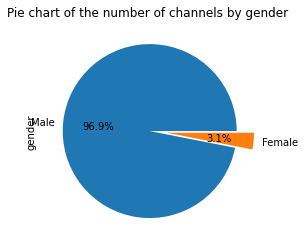

In [42]:
explode = (0,0.2,)
_ = summery_df['gender'].value_counts().plot.pie(explode=explode,autopct='%1.1f%%')
plt.title('Pie chart of the number of channels by gender ')
plt.show()

##### Country & Continent column

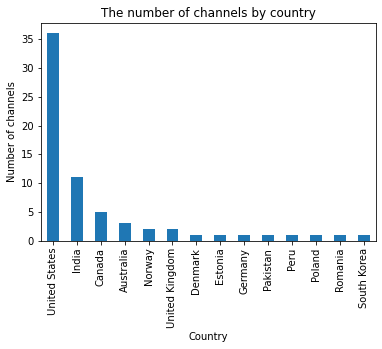

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure()
_ = summery_df['country'].value_counts().plot.bar()
plt.xlabel('Country')
plt.ylabel('Number of channels')
plt.title('The number of channels by country')
plt.show()

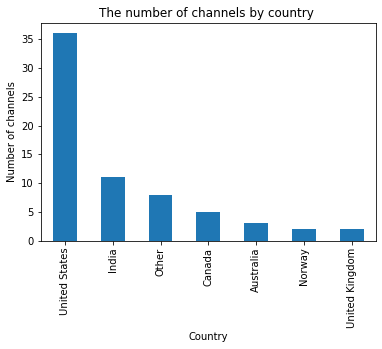

In [44]:
plt.figure()
_ = summery_df['countryOther'].value_counts().plot.bar()
plt.xlabel('Country')
plt.ylabel('Number of channels')
plt.title('The number of channels by country ')
plt.show()

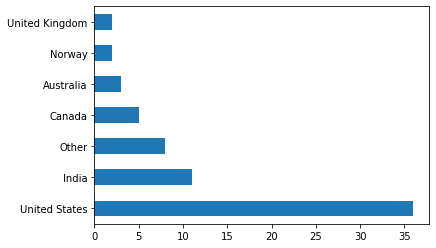

In [45]:
# we can horizontal plot
_ = summery_df['countryOther'].value_counts().plot.barh()

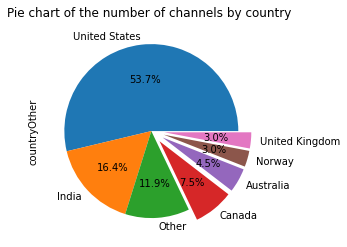

In [46]:
explode = (0,0,0, 0.15,0.15, 0.15,0.15,)
summery_df['countryOther'].value_counts().plot.pie(explode=explode,autopct='%1.1f%%')
plt.title('Pie chart of the number of channels by country ')
plt.show()

Plot show that the half of the channels are based in US than in India.

In [47]:
summery_df.continent.value_counts()

North america    41
Asia             13
Europe            9
Oceania           3
South america     1
Name: continent, dtype: int64

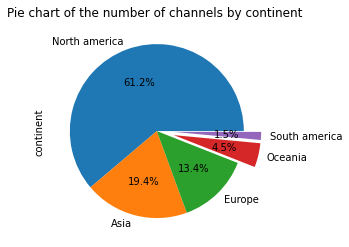

In [48]:
explode = (0,0,0, 0.2,0.2,)
summery_df['continent'].value_counts().plot.pie(explode=explode,autopct='%1.1f%%')
plt.title('Pie chart of the number of channels by continent ')
plt.show()

##### Top 10

###### Video Count

In [49]:
def top10(df,column,sort_ascending=False,n=10, set_index=None):
  '''
  return the n top value in given DataFrame for give column

  Args:
  df (DataFrame):
  column (string): column name
  sort_ascending (bool): sort ascending the value if True
  n (int): number of rows to return
  set_index: 

  return:
  DataFrame with n rows
  '''

  if set_index:

    return df.set_index(set_index).sort_values(by=column,ascending=sort_ascending).videoCount.head(n)
    
  else:

    return df.sort_values(by=column,ascending=sort_ascending).videoCount.head(n)

In [50]:
top10(summery_df,'videoCount',sort_ascending=False,n=10, set_index='title')

title
Durga Software Solutions    16443
Telusko                      1469
Caleb Curry                  1387
Perfect Web Solutions        1286
CodeWithHarry                1271
sentdex                      1226
freeCodeCamp.org             1164
Derek Banas                  1160
The Coding Train             1117
Krish Naik                   1102
Name: videoCount, dtype: int32

In [51]:
top10VideoCount = summery_df.set_index('title').sort_values(by=['videoCount'],ascending=False).videoCount.head(10)

In [52]:
top10VideoCount

title
Durga Software Solutions    16443
Telusko                      1469
Caleb Curry                  1387
Perfect Web Solutions        1286
CodeWithHarry                1271
sentdex                      1226
freeCodeCamp.org             1164
Derek Banas                  1160
The Coding Train             1117
Krish Naik                   1102
Name: videoCount, dtype: int32

In [53]:
summery_df.set_index('title').sort_values(by=['videoCount'],ascending=False)[['videoCount', 'country', 'publishedDate']].head(10)

,videoCount,country,publishedDate
title,,,
Durga Software Solutions,16443,India,2014-02-03
Telusko,1469,India,2014-04-29
Caleb Curry,1387,United States,2009-08-18
Perfect Web Solutions,1286,Pakistan,2015-06-26
CodeWithHarry,1271,India,2018-04-28
sentdex,1226,United States,2012-12-16
freeCodeCamp.org,1164,United States,2014-12-16
Derek Banas,1160,United States,2008-08-12
The Coding Train,1117,United States,2006-07-03


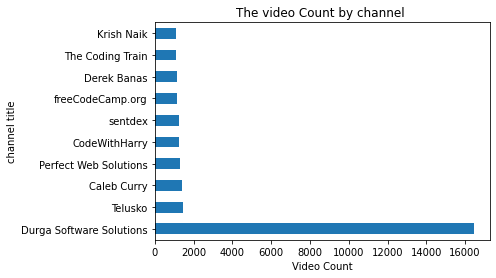

In [54]:
plt.figure()
top10VideoCount.plot.barh()
plt.xlabel('Video Count')
plt.ylabel('channel title')
plt.title('The video Count by channel ')
plt.show()

The Durga Software Solutions channel has by far the largest number of videos, ten times more than the channel that comes next.  look like an outlers.   
DURGA Software Solutions is also an institute in Hyderabad, one of the largest cities in India, which may explain this number.


The plot above suggests, that there is an ouliers,  we use boxplot t. 

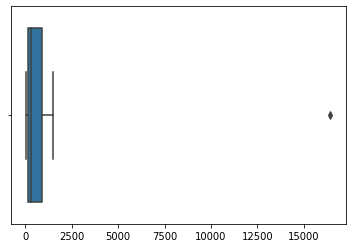

In [55]:
import seaborn as sns
sns.boxplot(x=summery_df.videoCount.values)
plt.show()

the is outlier, it plotted as individual points.

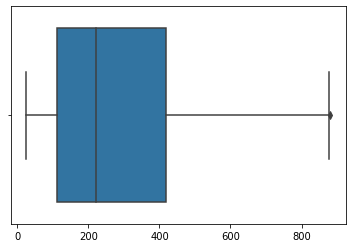

In [56]:
sns.boxplot(x=summery_df.sort_values(by=['videoCount'],ascending=False).videoCount.loc[1:].values)
plt.show()

the boxplot when we remove Durga Software Solutions channe row.

###### View Count

In [57]:
top10ViewCount = summery_df.set_index('title').sort_values(by=['viewCount'],ascending=False).viewCount.head(10)


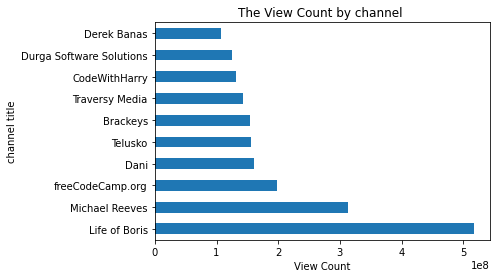

In [58]:
plt.figure()
top10ViewCount.plot.barh()
plt.xlabel('View Count')
plt.ylabel('channel title')
plt.title('The View Count by channel ')
plt.show()

Life of Boris has most view count, if check the channel you will find that the continte  ot this channel is more  bout liesstyle, cooking and gaming than coding. The same go for  Michael reeves channel it more about robotic.

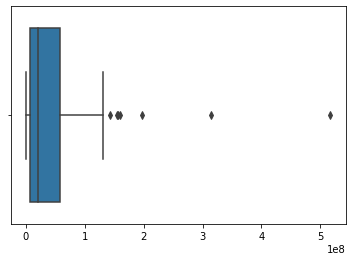

In [59]:
sns.boxplot(x=summery_df.viewCount.values)
plt.show()

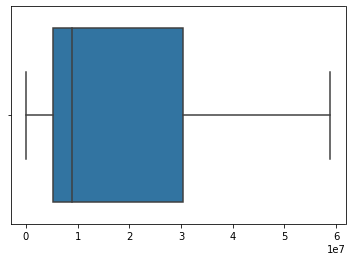

In [60]:
sns.boxplot(x=summery_df.sort_values(by=['viewCount'],ascending=False).viewCount.loc[2:].values)
plt.show()

the boxplot when we remove `Life of Boris` and  `Michael reeves` channel rows.

###### Subscriber Count

In [61]:
top10subscriberCount =  summery_df.set_index('title').sort_values(by=['subscriberCount'],ascending=False).subscriberCount.head(10)

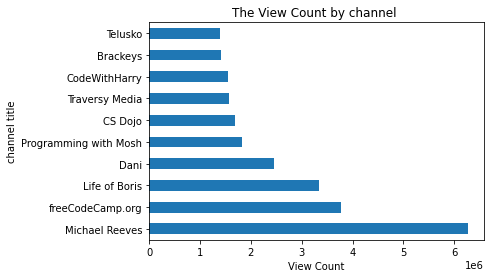

In [62]:
plt.figure()
top10subscriberCount.plot.barh()
plt.xlabel('View Count')
plt.ylabel('channel title')
plt.title('The View Count by channel ')
plt.show()

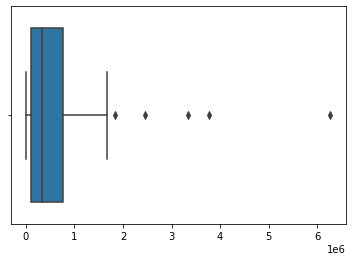

In [63]:
sns.boxplot(x=summery_df.subscriberCount.values)
plt.show()

In [64]:
summery_df.to_csv('summeryCleanDB.csv' ,index=False) #

##### Group by year of creation

In [65]:
summery_df['year'] = summery_df.publishedDate.dt.year

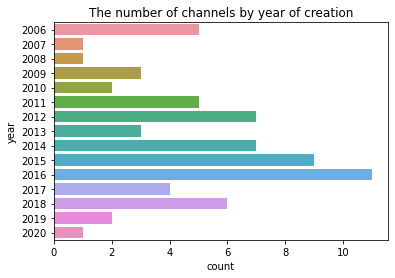

In [66]:
_ = sns.countplot(y="year", data=summery_df)
plt.title('The number of channels by year of creation')
plt.show()

##### viewCount vs subscriberCount vd videoCount

In next section, we will be using Z-score to to fetlter outiers.  
corrolation between `viewCount`, `subscriberCount` and `videoCount` column.

In [67]:
from scipy.stats import  zscore
import numpy as np



z_scores = zscore(summery_df[["viewCount", "subscriberCount",  'videoCount']])
abs_z_scores = np.abs(z_scores)

filtered_entries = (abs_z_scores < 3).all(axis=1)

df = summery_df[filtered_entries]

In [68]:
pd.cut(df.year, [2006, 2010, 2015, 2020], include_lowest=True).value_counts()

(2010.0, 2015.0]      28
(2015.0, 2020.0]      23
(2005.999, 2010.0]    12
Name: year, dtype: int64

In [69]:
df['yearClass'] = pd.cut(df.year, [2006, 2010, 2015, 2020], include_lowest=True)

<ipython-input-69-8fcf8351396b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['yearClass'] = pd.cut(df.year, [2006, 2010, 2015, 2020], include_lowest=True)


<AxesSubplot:xlabel='count', ylabel='countryOther'>

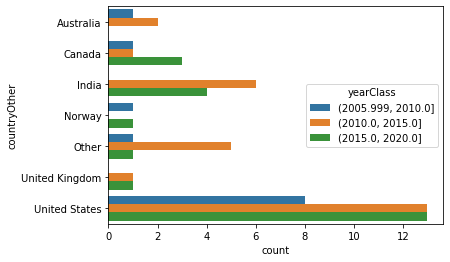

In [70]:
sns.countplot(y="countryOther", hue="yearClass", data=df)

In [71]:
df.shape

(63, 19)

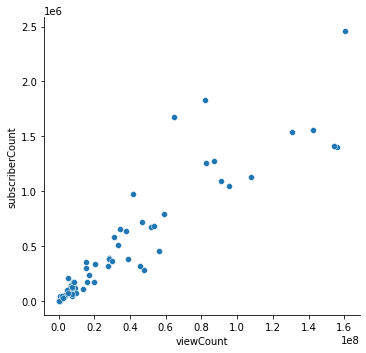

In [72]:

_ = sns.relplot(x="viewCount", y="subscriberCount",  data=df)#hue="size",

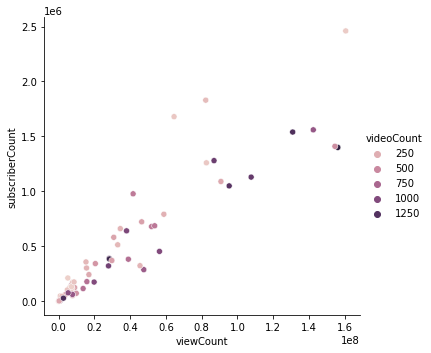

In [73]:
_ = sns.relplot(x="viewCount", y="subscriberCount",  hue='videoCount',data=df)

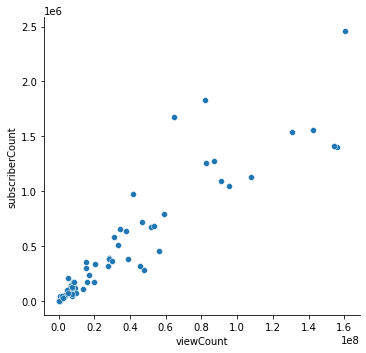

In [74]:
_ = sns.relplot(x="viewCount", y="subscriberCount",  data=df)

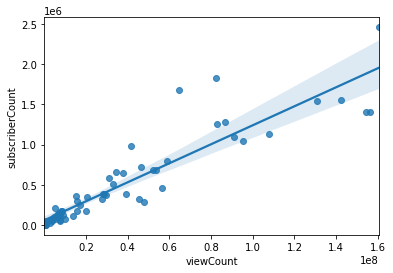

In [75]:
_ = sns.regplot(x="viewCount", y="subscriberCount",data=df)

The two plots above indicate positive linear correlation between`viewCount` and `subscriberCount`. We will Compute the correlation matrix to get the correlation coefficient.

In [76]:

# Compute the correlation matrix
corr = df.corr()
corr

,rank,viewCount,subscriberCount,videoCount,year
rank,1.000000,-0.507530,-0.579562,-0.200445,0.047612
viewCount,-0.507530,1.000000,0.918389,0.344907,-0.070209
subscriberCount,-0.579562,0.918389,1.000000,0.178449,0.017459
videoCount,-0.200445,0.344907,0.178449,1.000000,-0.348872
year,0.047612,-0.070209,0.017459,-0.348872,1.000000


We notice a strong positive correlation between `viewCount` and `subscriberCount`.  
 A weak negative correlation of `rank` with `viewCount` and `subscriberCount`.  
 Non-linear correlation between the variable `year` and the other variables, except for a weak negative correlation with `videoCount`.

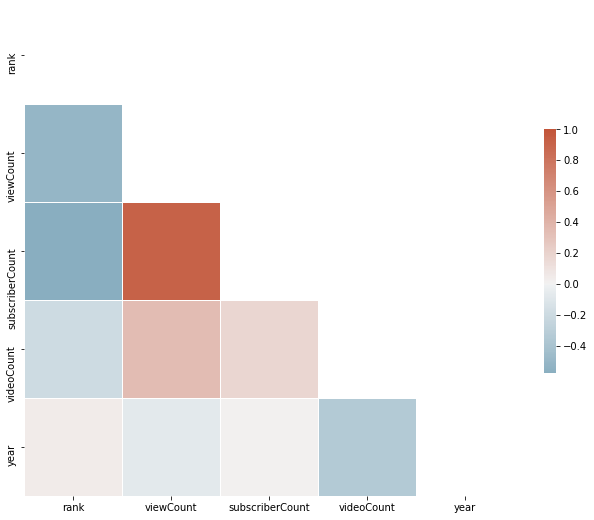

In [77]:
# code from https://seaborn.pydata.org/examples/many_pairwise_correlations.html
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()


In [78]:
df.describe(include='category')


,countryCode,country,countryOther,continent,yearClass
count,63,63,63,63,63
unique,13,13,7,5,3
top,US,United States,United States,North america,"(2010.0, 2015.0]"
freq,34,34,34,39,28


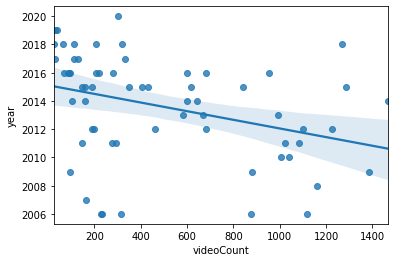

In [79]:
_ = sns.regplot(x="videoCount", y="year", data=df)

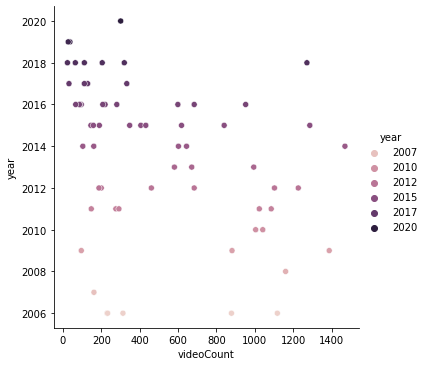

In [80]:
_ = sns.relplot(x="videoCount", y="year", hue='year', data=df)

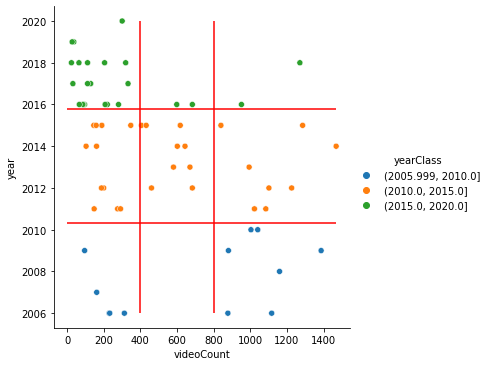

In [81]:
sns.relplot(x="videoCount", y="year", hue='yearClass', data=df)
plt.hlines(2015.8, 0, df.videoCount.max(),color='r')
plt.hlines(2010.3, 0, df.videoCount.max(),color='r')
plt.vlines(400, 2006, 2020,color='r')
plt.vlines(800, 2006, 2020,color='r')
plt.show()

In the upper right cluster of new channels created in 2016 or later with less than 400 videos. 
For channels created between 2011 and 2015, there is no single pattern.
In the bottom left we have a cluster of channels created between 2006 and 2010 with more than 800 videos. 

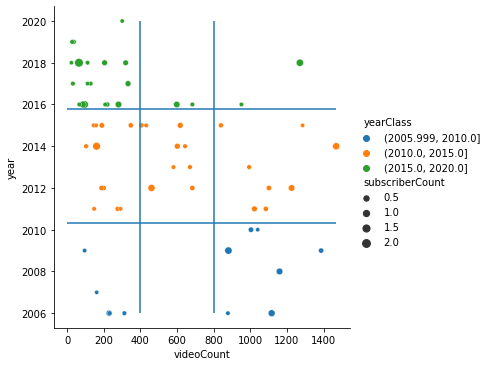

In [82]:
sns.relplot(x="videoCount", y="year", hue='yearClass', size='subscriberCount',data=df)
plt.hlines(2015.8, 0, df.videoCount.max())
plt.hlines(2010.3, 0, df.videoCount.max())
plt.vlines(400, 2006, 2020)
plt.vlines(800, 2006, 2020)
plt.show()

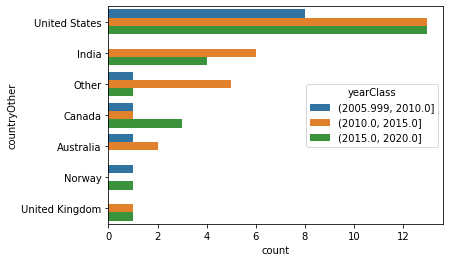

In [83]:
 
_ = sns.countplot(y="countryOther", hue="yearClass",order=summery_df.countryOther.value_counts().index, data=df)

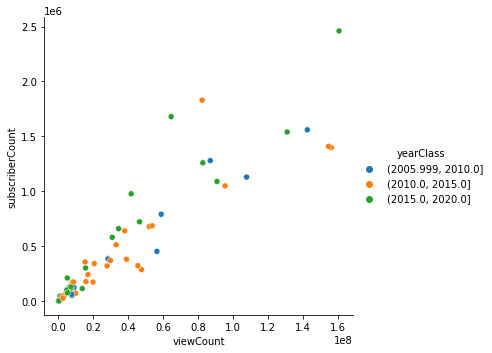

In [84]:
_ = sns.relplot(x="viewCount", y="subscriberCount",  hue='yearClass',data=df)

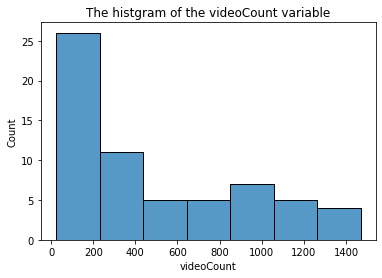

In [85]:
sns.histplot(df, x='videoCount')
plt.title('The histgram of the videoCount variable')
plt.show()

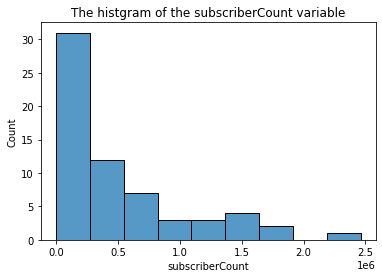

In [86]:
_ = sns.histplot(df, x='subscriberCount',)
plt.title('The histgram of the subscriberCount variable')
plt.show()

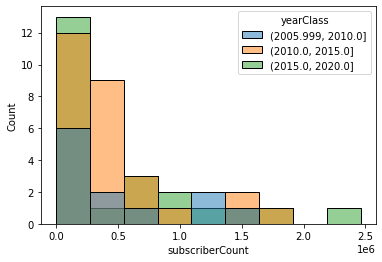

In [87]:
_ = sns.histplot(df, x='subscriberCount', hue='yearClass')

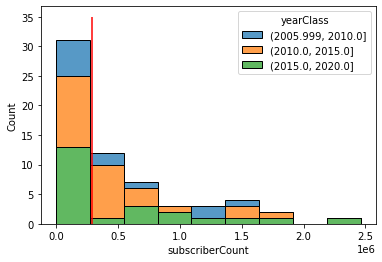

In [88]:
sns.histplot(df, x='subscriberCount', hue='yearClass', multiple="stack")
plt.vlines(df.subscriberCount.median(),0,35, colors='red')
plt.show()

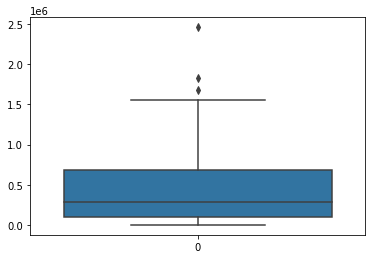

In [89]:
_ = sns.boxplot(data=df.subscriberCount)

In [90]:
quantiles = df.subscriberCount.quantile([0.25,0.5,0.75])
quantiles

0.25     97250.0
0.50    288000.0
0.75    683500.0
Name: subscriberCount, dtype: float64

In [91]:
df['subscriberCountClass'] = pd.cut(df.subscriberCount, [0, quantiles[0.25], quantiles[0.75], df.subscriberCount.max()], include_lowest=True)

<ipython-input-91-4ddfa62c8e52>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['subscriberCountClass'] = pd.cut(df.subscriberCount, [0, quantiles[0.25], quantiles[0.75], df.subscriberCount.max()], include_lowest=True)


In [92]:
df['subscriberCountClass'].value_counts()

(97250.0, 683500.0]      31
(-0.001, 97250.0]        16
(683500.0, 2460000.0]    16
Name: subscriberCountClass, dtype: int64

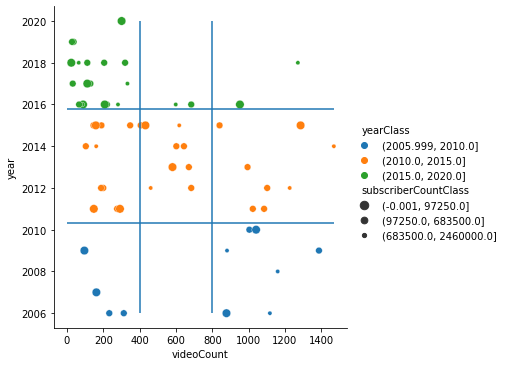

In [93]:
sns.relplot(x="videoCount", y="year", hue='yearClass', size='subscriberCountClass',data=df)
plt.hlines(2015.8, 0, df.videoCount.max())
plt.hlines(2010.3, 0, df.videoCount.max())
plt.vlines(400, 2006, 2020)
plt.vlines(800, 2006, 2020)
plt.show()

In [94]:
from sklearn.preprocessing import MinMaxScaler

# create a scaler object
scaler = MinMaxScaler()
# fit and transform the data
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
df_norm = pd.DataFrame(scaler.fit_transform(df.select_dtypes(include=numerics)), columns=df.select_dtypes(include=numerics).columns)

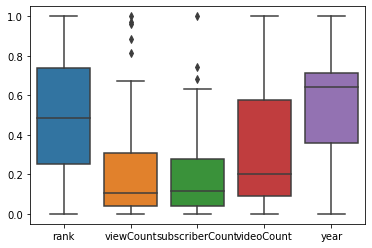

In [95]:
_ = sns.boxplot(data=df_norm)

In [96]:
df.subscriberCount.median()

288000.0

In [97]:
df.to_csv('data/channelStatistic.csv', index=False)

# The next step  <a class='anchor' id='chaptern'>
We will be collecting data statistics data about videos and playlists in each  single channel. See  [Extract YouTube video statistics and playlist](video_playlist.ipynb)